In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('summary.csv')

"""
log_entry = np.hstack((
    control_timestep,          # Timestamp
    cur_pos, target_pos,       # Position
    cur_vel, target_vel,       # Velocity
    cur_rpy, desired_euler,    # Orientation
    desired_thrust             # Thrust command
))
"""
# assign column names
df.columns = [
    'timestamp',
    'cur_pos_x', 'cur_pos_y', 'cur_pos_z',
    'target_pos_x', 'target_pos_y', 'target_pos_z',
    'cur_vel_x', 'cur_vel_y', 'cur_vel_z',
    'target_vel_x', 'target_vel_y', 'target_vel_z',
    'cur_rpy_x', 'cur_rpy_y', 'cur_rpy_z',
    'desired_euler_x', 'desired_euler_y', 'desired_euler_z',
    'desired_thrust'
]

# subtract timestamp of first entry
df['timestamp'] -= df['timestamp'][0]

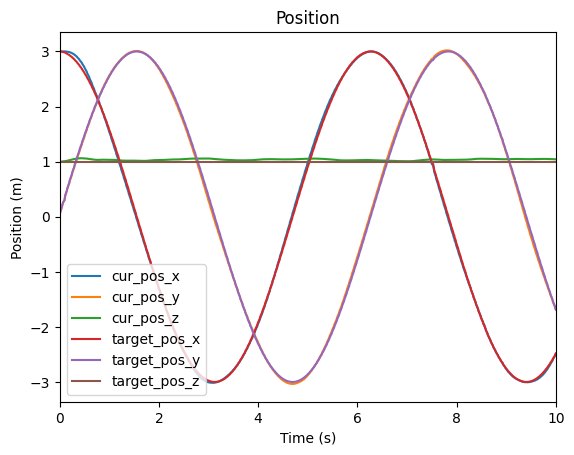

In [11]:
# plot position
plt.figure()
plt.plot(df['timestamp'], df['cur_pos_x'], label='cur_pos_x')
plt.plot(df['timestamp'], df['cur_pos_y'], label='cur_pos_y')
plt.plot(df['timestamp'], df['cur_pos_z'], label='cur_pos_z')
plt.plot(df['timestamp'], df['target_pos_x'], label='target_pos_x')
plt.plot(df['timestamp'], df['target_pos_y'], label='target_pos_y')
plt.plot(df['timestamp'], df['target_pos_z'], label='target_pos_z')
plt.legend()
plt.title('Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
# show only 10 seconds of data
plt.xlim([0, 10])
plt.show()

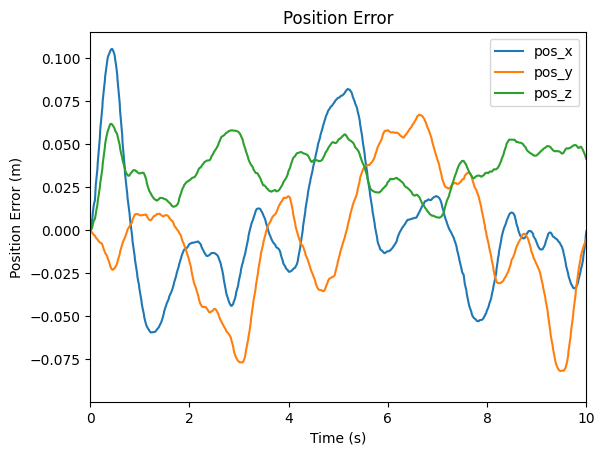

In [12]:
# plot position error
plt.figure()
plt.plot(df['timestamp'], df['cur_pos_x'] - df['target_pos_x'], label='pos_x')
plt.plot(df['timestamp'], df['cur_pos_y'] - df['target_pos_y'], label='pos_y')
plt.plot(df['timestamp'], df['cur_pos_z'] - df['target_pos_z'], label='pos_z')
plt.legend()
plt.title('Position Error')
plt.xlabel('Time (s)')
plt.ylabel('Position Error (m)')
# show only 10 seconds of data
plt.xlim([0, 10])
plt.show()


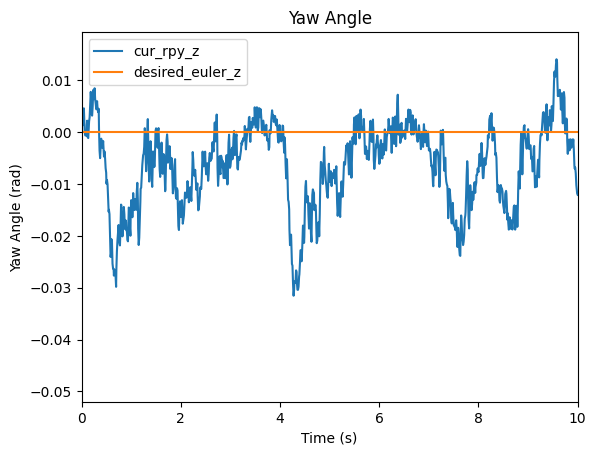

In [13]:
# plot yaw angle
plt.figure()
plt.plot(df['timestamp'], df['cur_rpy_z'], label='cur_rpy_z')
plt.plot(df['timestamp'], df['desired_euler_z'], label='desired_euler_z')
plt.legend()
plt.title('Yaw Angle')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Angle (rad)')
# show only 10 seconds of data
plt.xlim([0, 10])
plt.show()
